In [16]:
import numpy as np
import cv2

def calculate_homography(image_points, real_world_points):
    """
    Calculate the homography matrix for mapping image pixel coordinates to real-world coordinates.

    :param image_points: List of pixel coordinates in the image [(x1, y1), (x2, y2), ...].
    :param real_world_points: List of corresponding real-world coordinates [(lat1, lng1), (lat2, lng2), ...].
    :return: 3x3 homography matrix.
    """
    # Convert points to numpy arrays
    image_points_np = np.array(image_points, dtype=np.float32)
    real_world_points_np = np.array(real_world_points, dtype=np.float32)

    # Compute the homography matrix
    homography_matrix, _ = cv2.findHomography(image_points_np, real_world_points_np)
    return homography_matrix

def map_image_to_real_world(homography_matrix, image_point):
    """
    Map a single image pixel coordinate to the real-world coordinate using the homography matrix.

    :param homography_matrix: 3x3 homography matrix.
    :param image_point: Pixel coordinate as (x, y).
    :return: Real-world coordinate as (lat, lng).
    """
    print(image_point)
    # Convert the image point to homogeneous coordinates
    image_point_homogeneous = np.array([image_point[0], image_point[1], 1], dtype=np.float32)
    print(image_point_homogeneous)
    # Map the point using the homography matrix
    real_world_point = np.dot(homography_matrix, image_point_homogeneous)
    # Normalize to get (lat, lng)
    print(real_world_point)
    real_world_point /= real_world_point[2]
    print(real_world_point)
    return real_world_point[0], real_world_point[1]

def map_real_world_to_image(homography_matrix, real_world_point):
    """
    Map a single real-world coordinate to the image pixel coordinate using the homography matrix.

    :param homography_matrix: 3x3 homography matrix (inverse used here).
    :param real_world_point: Real-world coordinate as (lat, lng).
    :return: Image pixel coordinate as (x, y).
    """
    
    # Compute the inverse of the homography matrix
    inverse_homography = np.linalg.inv(homography_matrix)
    # Convert the real-world point to homogeneous coordinates
    real_world_point_homogeneous = np.array([real_world_point[0], real_world_point[1], 1], dtype=np.float32)
    # Map the point using the inverse homography matrix
    image_point = np.dot(inverse_homography, real_world_point_homogeneous)
    # Normalize to get (x, y)
    image_point /= image_point[2]
    return int(round(image_point[0])), int(round(image_point[1]))

 

In [17]:
""" 
Cemetery Rd. HIlliard, OH
"""
real_world_points = [
    (40.0301643, -83.1613408),  # Point A
    (40.0301767, -83.1612135),  # Point B
    (40.0297526, -83.1612916),  # Point C
    (40.0297585, -83.1611691),  # Point D
]
image_points = [
    (974, 380),   # Point A
    (1063, 399),  # Point B
    (738, 587),   # Point C
    (863, 617),   # Point D
]
#Calculate the Homography Matrix
H = calculate_homography(image_points, real_world_points)
print("Homography Matrix (H):")
print(H)

# Test: Map a Pixel Coordinate to Real-World Coordinate
test_image_point = (1203, 452) # Point A in the image
mapped_real_world_point = map_image_to_real_world(H, test_image_point)
print(f"Mapped Real-World Point for {test_image_point}: {mapped_real_world_point}")

# Test: Map a Real-World Coordinate to Image Pixel Coordinate
test_real_world_point = (40.0297585, -83.1611691)   
mapped_image_point = map_real_world_to_image(H, test_real_world_point)
print(f"Mapped Image Pixel Point for {test_real_world_point}: {mapped_image_point}")

Homography Matrix (H):
[[-2.19664313e-02  7.91358229e-02  4.00304124e+01]
 [ 4.56373888e-02 -1.64405670e-01 -8.31632638e+01]
 [-5.48766126e-04  1.97697031e-03  1.00000000e+00]]
(1203, 452)
[1.203e+03 4.520e+02 1.000e+00]
[  49.37418755 -102.57284767    1.23342493]
[ 40.03015208 -83.16099757   1.        ]
Mapped Real-World Point for (1203, 452): (40.03015207935313, -83.16099757448058)
Mapped Image Pixel Point for (40.0297585, -83.1611691): (863, 617)


In [6]:
""" 
NY 67 Dunning St. Malta, NY 
"""
real_world_points = [
    (42.9710672, -73.7926316),  # Point A
    (42.9712363, -73.7926224),  # Point B
    (42.9712580, -73.7931736),  # Point C
    (42.9710680, -73.7932007),  # Point D
]
image_points = [
    (919, 277),   # Point A
    (694, 331),  # Point B
    (965, 722),   # Point C
    (1311, 603),   # Point D
]
# Calculate the Homography Matrix
H = calculate_homography(image_points, real_world_points)
print("Homography Matrix (H):")
print(H)

# Test: Map a Pixel Coordinate to Real-World Coordinate
test_image_point = (1182, 417)  # Point A in the image
mapped_real_world_point = map_image_to_real_world(H, test_image_point)
print(f"Mapped Real-World Point for {test_image_point}: {mapped_real_world_point}")

# Test: Map a Real-World Coordinate to Image Pixel Coordinate
test_real_world_point = (42.9713779,-73.7929685)   
mapped_image_point = map_real_world_to_image(H, test_real_world_point)
print(f"Mapped Image Pixel Point for {test_real_world_point}: {mapped_image_point}")

Homography Matrix (H):
[[ 1.51774675e-03  1.13288058e-01  4.29717118e+01]
 [-2.60919002e-03 -1.94546545e-01 -7.37908411e+01]
 [ 3.53462090e-05  2.63634802e-03  1.00000000e+00]]
Mapped Real-World Point for (1182, 417): (42.97101813449444, -73.792971351568)
Mapped Image Pixel Point for (42.9713779, -73.7929685): (595, 615)


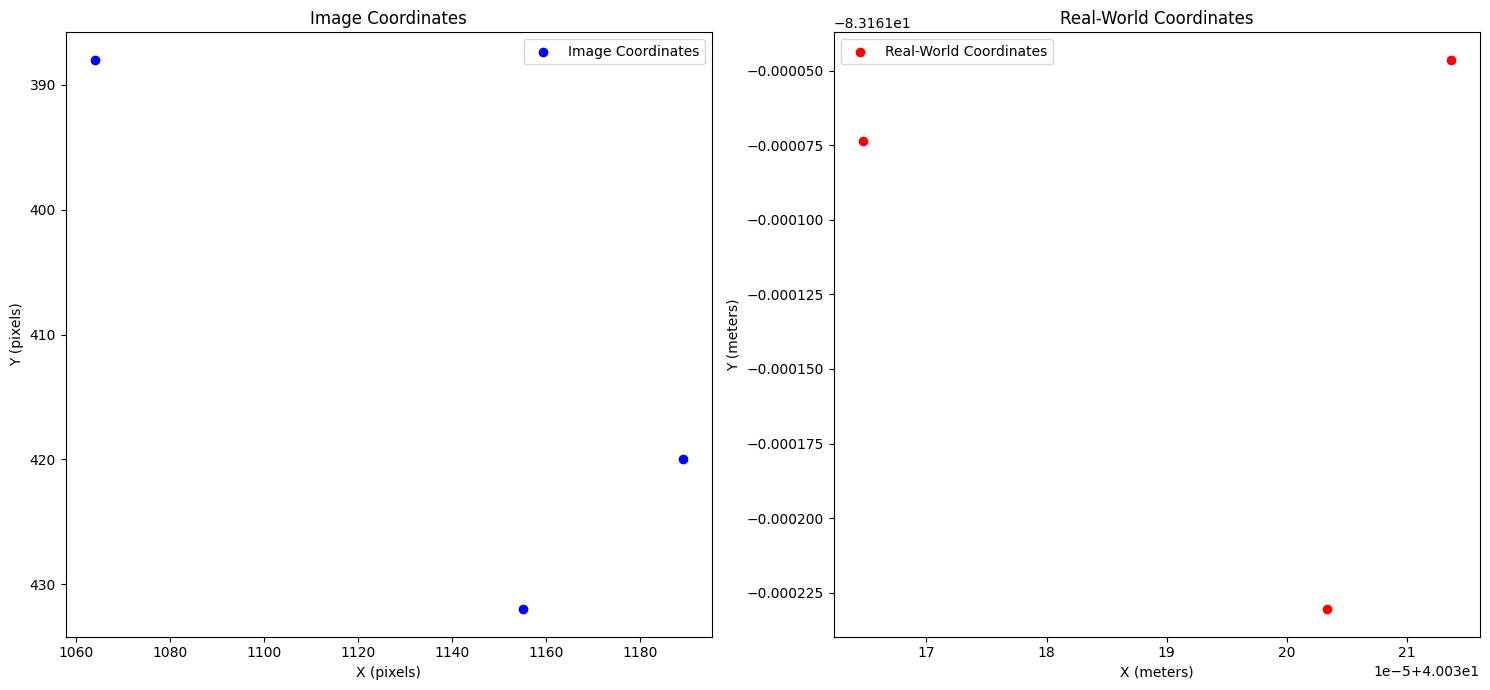

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import re

# Given Homography Matrix (for demonstration, replace with the correct one)
H_inv = np.array([
    [-2.19664313e-02,  7.91358229e-02,  4.00304124e+01],
    [ 4.56373888e-02, -1.64405670e-01, -8.31632638e+01],
    [-5.48766126e-04,  1.97697031e-03,  1.00000000e+00]
])

# Function to map image pixel coordinates to real-world coordinates
def map_image_to_real_world(H_inv, pixel_coord):
    x, y = pixel_coord
    pixel_vec = np.array([x, y, 1.0])
    real_world_vec = H_inv @ pixel_vec
    X = real_world_vec[0] / real_world_vec[2]
    Y = real_world_vec[1] / real_world_vec[2]
    return (X, Y)

# Function to extract coordinates from the text
def extract_coordinates(log):
    pattern = r"\((\d+), (\d+)\)"
    matches = re.findall(pattern, log)
    coordinates = [(int(x), int(y)) for x, y in matches]
    return coordinates

# Extract coordinates from the log
log_data = """
(1155, 432) c
(1064, 388) c
(1189, 420) c
"""
 # Replace with your provided log data
image_coordinates = extract_coordinates(log_data)

# Convert image coordinates to real-world coordinates
real_world_coordinates = [map_image_to_real_world(H_inv, coord) for coord in image_coordinates]

# Plotting the coordinates
def plot_coordinates(image_coords, real_world_coords):
    fig, axs = plt.subplots(1, 2, figsize=(15, 7))

    # Plot image coordinates
    axs[0].scatter(*zip(*image_coords), c='blue', label='Image Coordinates')
    axs[0].set_title("Image Coordinates")
    axs[0].set_xlabel("X (pixels)")
    axs[0].set_ylabel("Y (pixels)")
    axs[0].legend()
    axs[0].invert_yaxis()  # Image coordinates have (0, 0) at the top-left

    # Plot real-world coordinates
    axs[1].scatter(*zip(*real_world_coords), c='red', label='Real-World Coordinates')
    axs[1].set_title("Real-World Coordinates")
    axs[1].set_xlabel("X (meters)")
    axs[1].set_ylabel("Y (meters)")
    axs[1].legend()

    plt.tight_layout()
    plt.show()

# Plot the extracted and converted coordinates
plot_coordinates(image_coordinates, real_world_coordinates)
